In [1]:
#############################
### Import libraries ###
#############################

from docplex.cp.model import *
from docplex.cp.config import get_default
import numpy as np
from Solver import *
from User import *
import time
import matplotlib.pyplot as plt

In [2]:
#############################
### Essentials functions ###
#############################
import FunctionMain as fm

In [3]:
# ----------------- Parameters

# The file to consider
file = './file_with_optimal_val/la04.txt'

# The number of solutions that we will have in the solver during the first iteration
k = 20

# The number of layer which is fixed
nb_layers = 5

# Variable which display the solution
display_sol = False

# Variable which display the start (in a vector)
display_start = False

# Variable which display the start (in a matrix)
display_matrix = False

# Time stop criterion 
tps_max = 300

# Number of iteration stop criterion
it_max = 20

# Initialization of the number of iteration
it = 1

# The number of solutions that we will have in the solver after the first iteration
k_k = 10


--------Main program is loading...---------
[0, 2, 3, 4, 1, 1, 3, 4, 2, 0, 1, 0, 3, 4, 2, 2, 4, 0, 3, 1, 1, 3, 4, 0, 2, 3, 2, 0, 4, 1, 2, 1, 0, 3, 4, 1, 3, 0, 4, 2, 2, 4, 0, 1, 3, 2, 4, 3, 1, 0]

Creating the model variables...
Model variables created !

Solver initialized !

Solving the model...

Adding precedence constraints to the solver...
Precedence constraints added !

Adding disjunctive constraints to the solver...
Disjunctive constraints added !
Solution n°1: 
T0-2: (start=61, end=155, size=94, length=94)
T0-0: (start=0, end=12, size=12, length=12)
T0-3: (start=174, end=266, size=92, length=92)
T0-4: (start=425, end=516, size=91, length=91)
T0-1: (start=516, end=523, size=7, length=7)
T1-3: (start=157, end=168, size=11, length=11)
T1-1: (start=88, end=107, size=19, length=19)
T1-4: (start=168, end=234, size=66, length=66)
T1-2: (start=398, end=419, size=21, length=21)
T1-0: (start=581, end=668, size=87, length=87)
T2-0: (start=295, end=370, size=75, length=75)
T2-1: (start=152

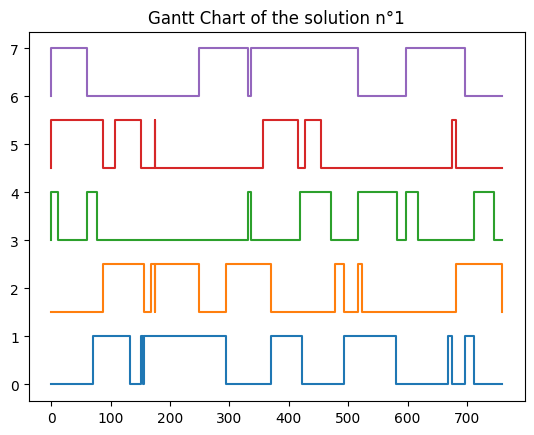

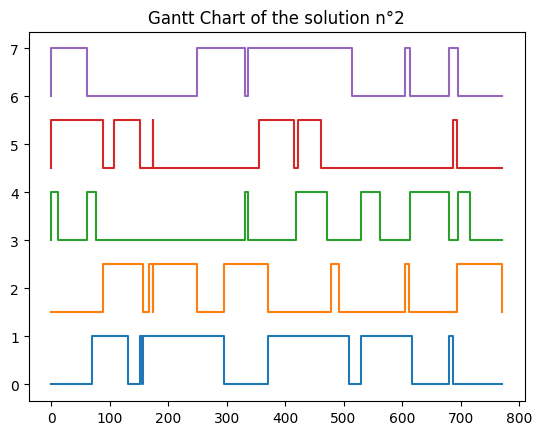

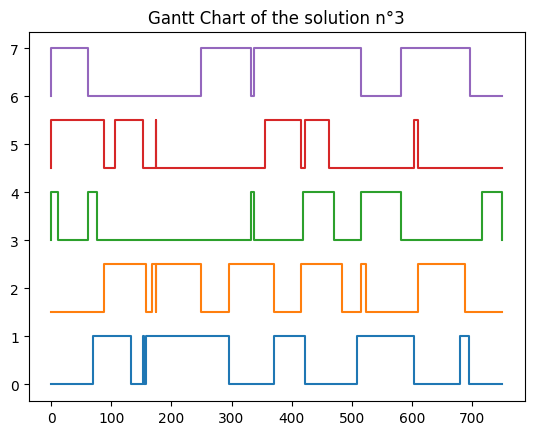

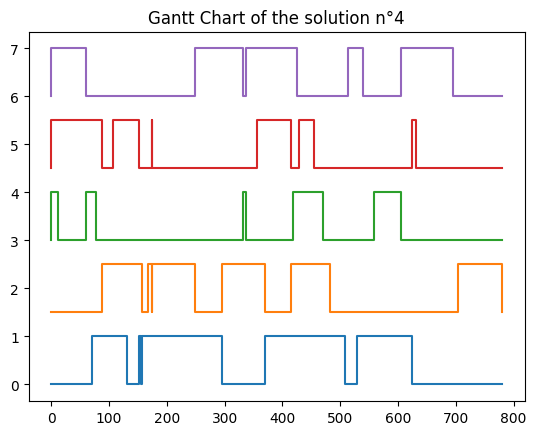

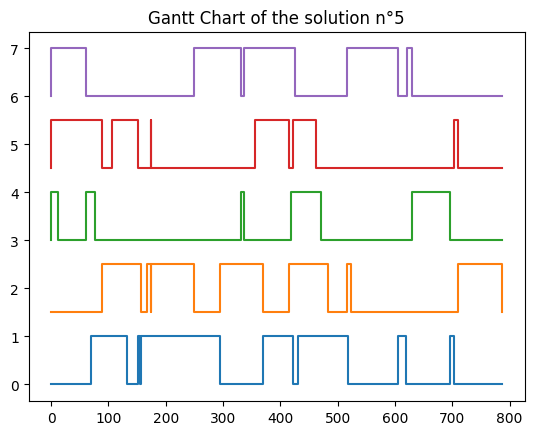

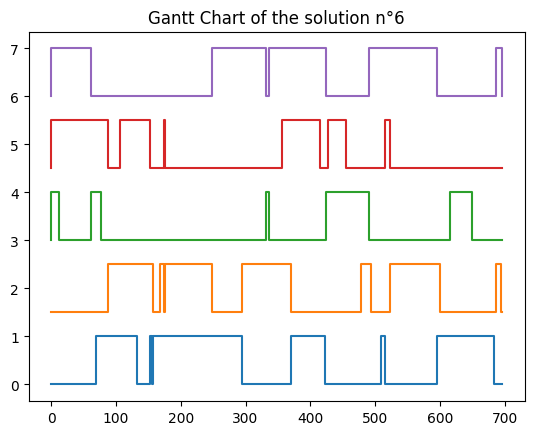

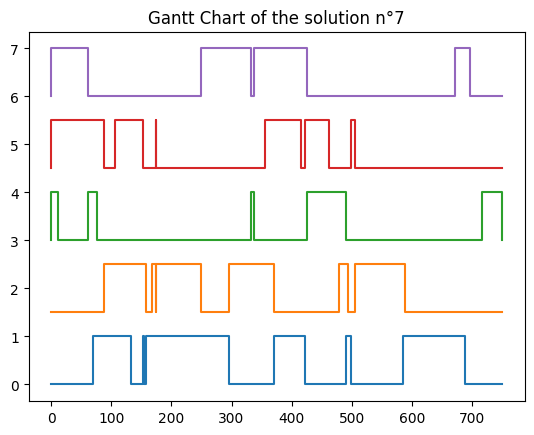

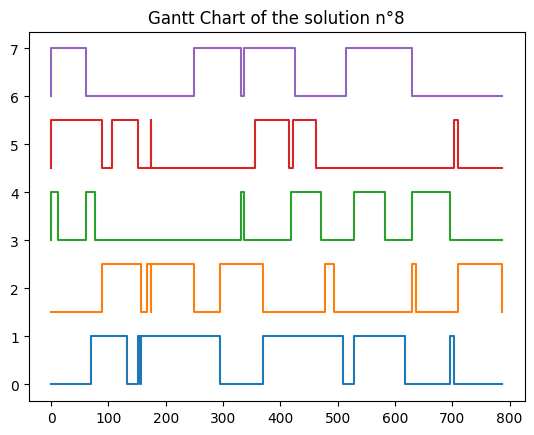

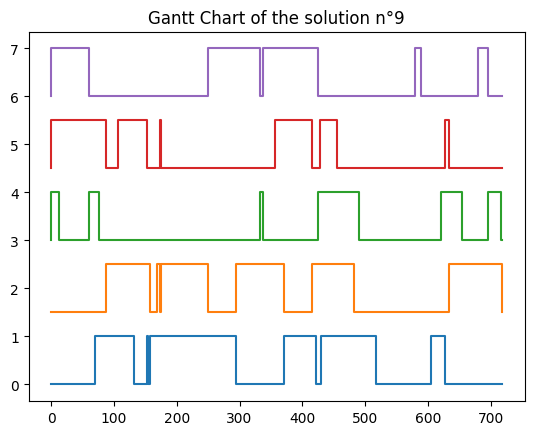

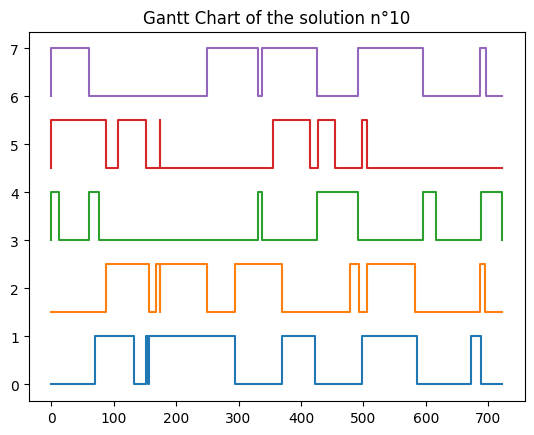

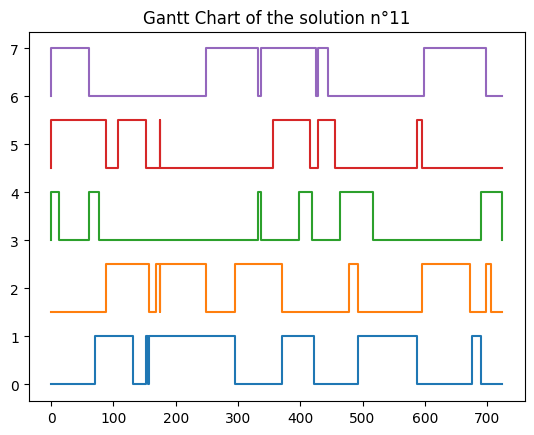

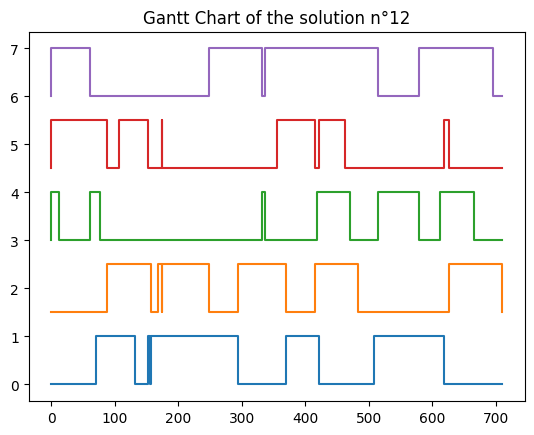

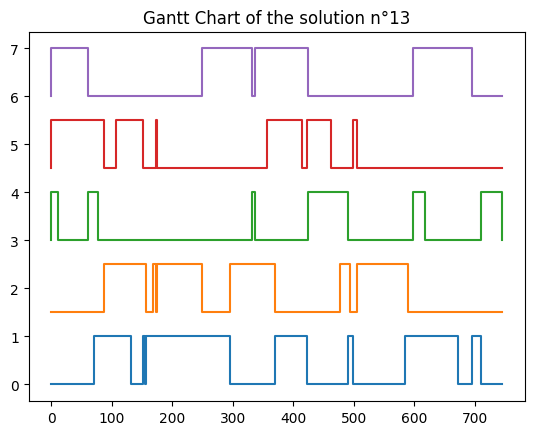

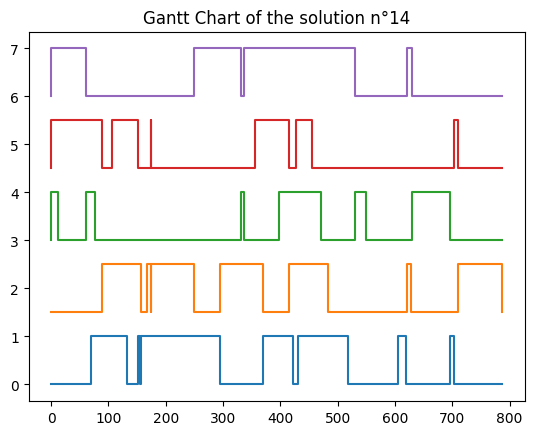

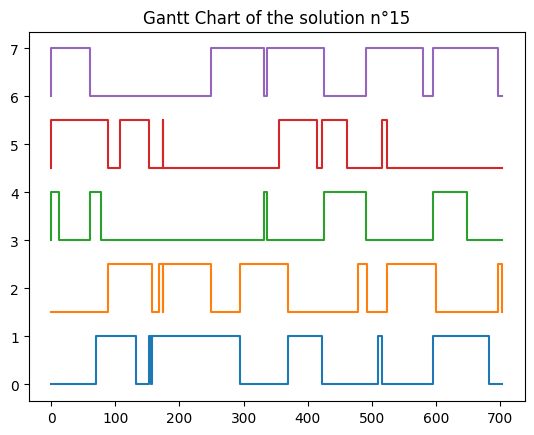

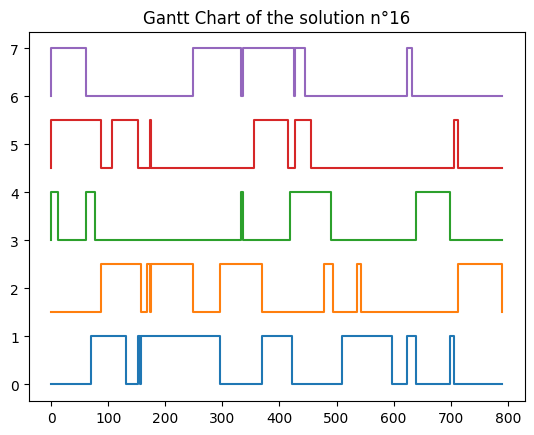

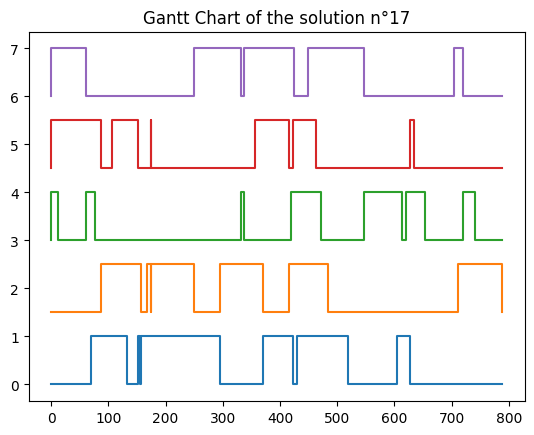

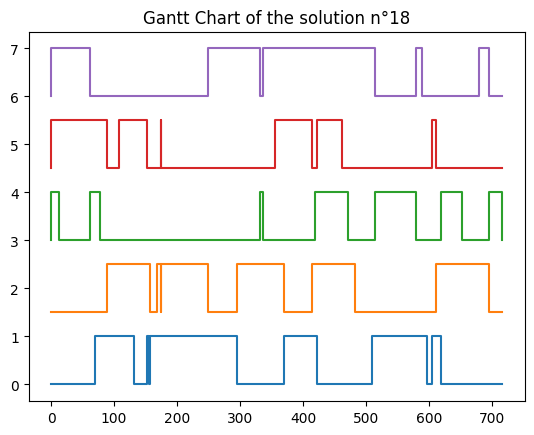

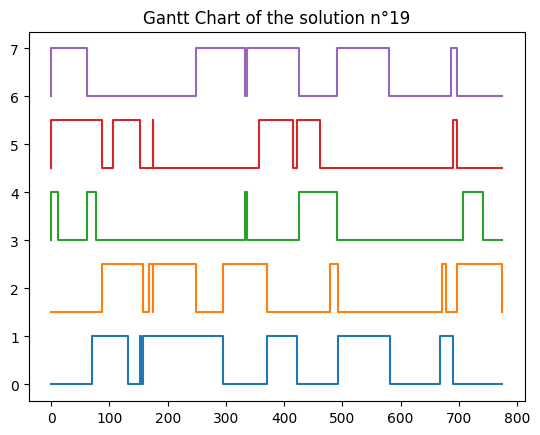

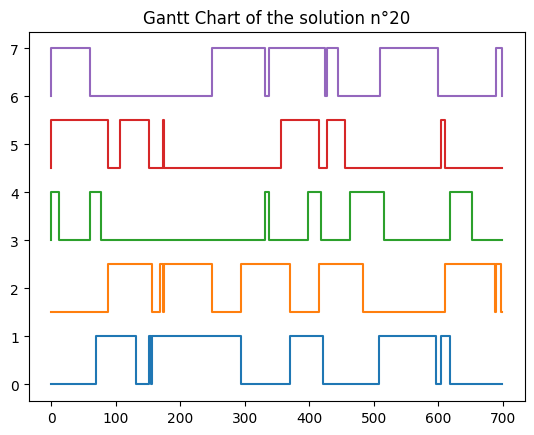

In [4]:
#############################
### Main program ###
#############################

print("\n--------Main program is loading...---------")

# --------- Interaction with the solver
data = []
n, m, data, T_machine, T_duration, duration, optimalval = fm.get_data_from_file(file)
print(T_machine)
# --------- Call Solver constructor in Solver.py and create the variables of the model
model, solver = fm.initialize_solver(data, n, m, duration)

# ------------ Solve the model
print("\nSolving the model...")
msol, nb_solution, runtime = solver.solve(model, k, n, m, 0, T_machine, optimalval)

j = 0
for sol in msol:
    j = j + 1
    sol_list = sol.get_all_var_solutions()
    print("Solution n°{}: ".format(j))
    for i in range(len(sol_list)):
        print(sol_list[i])

# ------------ Generate Gantt Chart
start_times = []
end_times = []
task_lengths = []

n_sol = 0
for sol in msol:
    n_sol = n_sol + 1
    sol_list = sol.get_all_var_solutions()
    
    mkspan=max([sol_list[i].get_end() for i in range(len(sol_list))] )
    x = [ [] for i in range(m)]
    y = [ [] for i in range(m)]
    mp = [ {} for i in range(m)]
    sz=len(sol_list)
    for i in range(sz) : 
        ind=T_machine[i]
        x[ind].append(sol_list[i].get_start())
        mp[ind][sol_list[i].get_start()]=ind
        x[ind].append(sol_list[i].get_end())
        mp[ind][sol_list[i].get_end()]=ind+1
    eps=0.5
    for i in range(m):
        x[i]=sorted(x[i])
        y[i]=[mp[i][x[i][j]]+i*eps for j in range(len(x[i]))]
        x[i]=[0]+x[i]
        y[i]=[i+i*eps]+y[i]
        x[i]=x[i]+[mkspan]
        y[i].append(i+i*eps)
        plt.step(x[i],y[i])
    plt.title("Gantt Chart of the solution n°" + str(n_sol))
    plt.show()



    # for i in range(len(sol_list)):
    #     task_name = sol_list[i].get_name()
    #     # print(task_name)
    #     start_times.append(sol_list[i].get_start())
    #     end_times.append(sol_list[i].get_end())
    #     task_lengths.append(sol_list[i].get_size())
    # plt.figure(figsize=(10, 6))
    # plt.barh(range(len(start_times)), task_lengths, left=start_times, height=0.5, alpha=0.8)
    # plt.xlabel('Time')
    # plt.ylabel('Tasks')
    # plt.title('Gantt Chart')
    # # plt.yticks(range(len(start_times)), ['Task {}'.format(i) for i in range(len(start_times))])
    # # plt.grid(True)
    # plt.show()
    # start_times = []
    # end_times = []
    # task_lengths = []

# # ------------ Generate Gantt Chart
# start_times = []
# end_times = []

# for sol in msol:
#     sol_list = sol.get_all_var_solutions()
#     for i in range(len(sol_list)):
#         task_name = sol_list[i].get_name()
#         start_times.append(sol_list[i].get_start())
#         end_times.append(sol_list[i].get_end())

# plt.figure(figsize=(10, 6))
# plt.barh(range(len(start_times)), [end - start for start, end in zip(start_times, end_times)], left=start_times, height=0.5, alpha=0.8)
# plt.xlabel('Time')
# plt.ylabel('Tasks')
# plt.title('Gantt Chart')
# # plt.yticks(range(len(start_times)), ['Task {}'.format(i) for i in range(len(start_times))])
# # plt.grid(True)
# plt.show()









# # ------------ Display the result
# fm.display_solution(msol, display_sol)
# print("Model solved !")

# # ---------------- Interaction with the user
# print("\n--------Interaction with the user...---------")
# print("\nCreating the user...")
# user = User()
# print("User created !")

# #Get the variables of the model
# variables = solver.get_variables()

# list_indice, list_obj, pref, list_layers, list_equal = fm.user_preferences(msol, user, nb_layers)

# # Vector of the start time of each task of each preference
# starts = user.start_pref(n, m, variables, display_start)

# # Matrix of the start time of each task of each preference
# matrix = user.matrix_pref(n, m, display_matrix)

# # Testing the order of preferences and the differences between solutions
# fm.test(n, m, user)

# print("list layers : ",list_layers)
